In [49]:
# import dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import tensorflow as tf

<h1>initial data exploration</h1>
<h2>objectives</h2>
<ul>
    <li>view dataset</li>
    <li>check data types</li>
    <li>describe attributes</li>
    <li>check for null values</li>
    <li>check for zeros</li>
</ul>

<h2>view dataset</h2>

In [50]:
df = pd.read_csv('traffic_data_time_mapped.csv')
df

Date      Time  AUBURN_RD N of BURWOOD_RD  \
0      1/10/2006   0:00:00                         44   
1      1/10/2006   0:15:00                         53   
2      1/10/2006   0:30:00                         36   
3      1/10/2006   0:45:00                         35   
4      1/10/2006   1:00:00                         37   
...          ...       ...                        ...   
2971  31/10/2006  22:45:00                         38   
2972  31/10/2006  23:00:00                         34   
2973  31/10/2006  23:15:00                         28   
2974  31/10/2006  23:30:00                         26   
2975  31/10/2006  23:45:00                         22   

      AUBURN_RD S of BURWOOD_RD  BALWYN_RD N OF BELMORE_RD  \
0                            37                         25   
1                            36                         35   
2                            26                         19   
3                            34                         20   
4                            30                         14   
...                         ...                        ...   
2971                         42                         21   
2972                         42                         18   
2973                         32                         11   
2974                         30                         14   
2975                         22                          2   

      BALWYN_RD N OF WHITEHORSE_RD  BALWYN_RD N of CANTERBURY_RD  \
0                               22                          18.0   
1                               38                          25.0   
2                               32                          23.0   
3                               22                          20.0   
4                               18                          10.0   
...                            ...                           ...   
2971                            28                          22.0   
2972                            21                          12.0   
2973                            11                          15.0   
2974                            11                           8.0   
2975                            13                           4.0   

      BALWYN_RD S OF BELMORE_RD  BALWYN_RD S OF WHITEHORSE_RD  \
0                          34.0                            31   
1                          28.0                            23   
2                          38.0                            28   
3                          30.0                            21   
4                          21.0                            13   
...                         ...                           ...   
2971                       44.0                            39   
2972                       36.0                            30   
2973                       38.0                            25   
2974                       21.0                            15   
2975                       20.0                            14   

      BALWYN_RD S of DONCASTER_RD  BARKERS_RD E of DENMARK_ST  \
0                              22                        56.0   
1                              27                        59.0   
2                              22                        40.0   
3                              23                        47.0   
4                              21                        35.0   
...                           ...                         ...   
2971                           33                        50.0   
2972                           23                        60.0   
2973                           27                        31.0   
2974                           17                        40.0   
2975                           14                        26.0   

      BARKERS_RD E of HIGH_ST  BARKERS_RD W of BURKE_RD  \
0                          50                        52   
1                          51                        55   
2                         

In [51]:
df.shape

(2976, 141)

the dataset is compose of 141 columns and 2976 rows. 2 columns are time components (i.e., Date and Time), the rest are the number of cars that a specfici detector has recorded

<h2>check data types</h2>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 141 entries, Date to WILLS_ST NW OF HIGH_ST
dtypes: float64(35), int64(104), object(2)
memory usage: 3.2+ MB


the data set is composed of 35 float values, 104 int64s, and 2 objects (these are the time components)

<h2>describe attributes</h2>

In [53]:
pd.set_option('display.max_rows', 141)
df.describe().transpose()

count        mean         std   min  \
AUBURN_RD N of BURWOOD_RD               2976.0  115.924059   83.766227   0.0   
AUBURN_RD S of BURWOOD_RD               2976.0   96.923723   68.892657   0.0   
BALWYN_RD N OF BELMORE_RD               2976.0   78.956989   61.276446   0.0   
BALWYN_RD N OF WHITEHORSE_RD            2976.0   83.027890   59.759329   0.0   
BALWYN_RD N of CANTERBURY_RD            2496.0   66.254006   52.653573   0.0   
BALWYN_RD S OF BELMORE_RD               2880.0   91.251389   69.440792   0.0   
BALWYN_RD S OF WHITEHORSE_RD            2976.0   78.294355   59.831675   0.0   
BALWYN_RD S of DONCASTER_RD             2976.0   72.645497   60.591951   0.0   
BARKERS_RD E of DENMARK_ST              2496.0  122.165865   86.537916   0.0   
BARKERS_RD E of HIGH_ST                 2976.0  127.062836  101.577972   0.0   
BARKERS_RD W of BURKE_RD                2976.0   96.544019   71.329813   0.0   
BARKERS_RD W of CHURCH_ST               2976.0  191.780914  115.959256   0.0   
BARKERS_RD W of DENMARK_ST              2496.0  108.399439   76.358795   0.0   
BELMORE_RD E OF BALWYN_RD               2880.0   70.304861   61.584678   0.0   
BELMORE_RD E of BURKE_RD                2976.0   79.760081   68.718920   0.0   
BELMORE_RD W OF BALWYN_RD               2976.0   76.259073   62.588820   0.0   
BRIDGE_RD SW of BURWOOD_RD              2496.0  130.194311   84.417197   3.0   
BULLEEN_RD N of THOMPSONS_RD            2976.0  171.758737  116.319734   0.0   
BULLEEN_RD S of EASTERN_FWY_W_BD_RAMPS  2976.0   83.098790   66.658056   0.0   
BURKE_RD N OF WHITEHORSE_RD             2976.0  149.219758  100.629822   0.0   
BURKE_RD N of CANTERBURY_RD             2976.0  140.343750   84.059417   0.0   
BURKE_RD N of HARP_RD                   2976.0  131.764785   87.715432   0.0   
BURKE_RD N of MONT ALBERT_RD            2976.0  140.473790   88.458412   0.0   
BURKE_RD N of RIVERSDALE_RD             2976.0   84.649866   44.564557   1.0   
BURKE_RD N of TOORAK_RD                 2976.0  138.135753   86.554408   2.0   
BURKE_RD S OF WHITEHORSE_RD             2976.0  148.355511   96.151833   0.0   
BURKE_RD S of BARKERS_RD                2976.0  112.687500   66.061523   0.0   
BURKE_RD S of CANTERBURY_RD             2976.0  116.001680   66.019562   0.0   
BURKE_RD S of DONCASTER_RD              2976.0  167.585349  101.498279   0.0   
BURKE_RD S of EASTERN_FWY               2976.0  144.811156  104.479673   0.0   
BURKE_RD S of HARP_RD                   2976.0  152.151546   98.986366   0.0   
BURKE_RD S of RIVERSDALE_RD             2976.0   78.629032   42.682933   2.0   
BURKE_RD S of TOORAK_RD                 2976.0  127.351142   79.076221   0.0   
BURNLEY_ST S OF VICTORIA_ST             2976.0   70.747648   52.854535   0.0   
BURWOOD_HWY E of WARRIGAL_RD            2784.0  158.143319  106.379242   0.0   
BURWOOD_RD E of AUBURN_RD               2976.0  114.618616   83.172172   0.0   
BURWOOD_RD E of GLENFERRIE_RD           2976.0  130.899866   91.808273   0.0   
BURWOOD_RD E of POWER_ST                2496.0  115.171074   74.441337   3.0   
BURWOOD_RD W of AUBURN_RD               2976.0  124.479503   77.416709   0.0   
BURWOOD_RD W of GLENFERRIE_RD           2976.0  120.655578   74.485466   3.0   
BURWOOD_RD W of POWER_ST                2496.0   96.749199   59.590436   2.0   
CAMBERWELL_RD NW of BURKE_RD            2976.0   59.762769   39.981754   0.0   
CAMBERWELL_RD NW of TRAFALGAR_RD        2976.0   93.313172   73.355564   0.0   
CAMBERWELL_RD SE of BURKE_RD            2976.0   58.296035   42.694554   0.0   
CAMBERWELL_RD SE of TRAFALGAR_RD        2976.0  117.314180   93.052943   0.0   
CANTERBURY_RD E of BALWYN_RD            2496.0  162.663061  115.744241   0.0   
CANTERBURY_RD E of BURKE_RD             2976.0  105.413306   80.487046   0.0   
CANTERBURY_RD E of STANHOPE_GV          2976.0  147.038978  111.589376   0.0   
CANTERBURY_RD E of WARRIGAL_RD          2976.0  144.790659  108.773357   0.0   
CANTERBURY_RD W of BALWYN_RD            2

<AxesSubplot:>

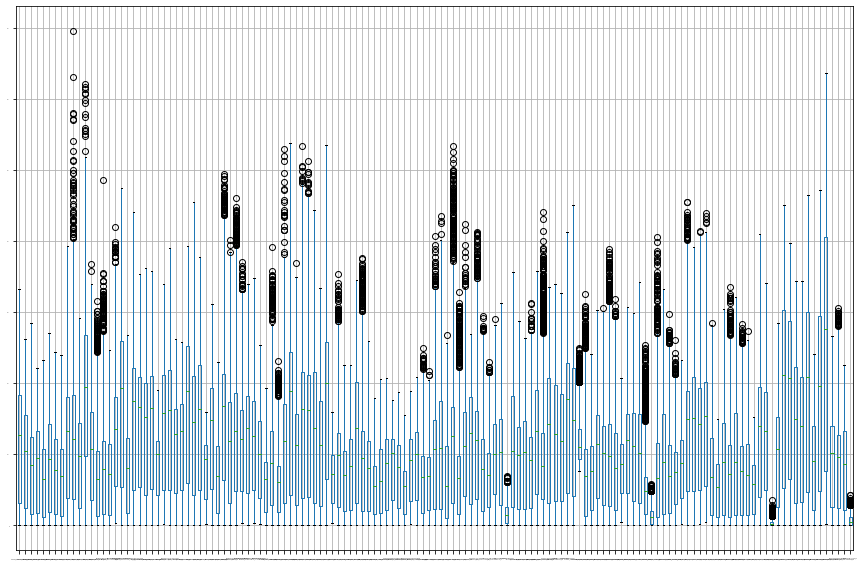

In [54]:
boxplot_df = df.drop(columns=['Date', 'Time']).copy()
boxplot_df.boxplot(figsize=(15,10), fontsize = 0)

The dataset is seemingly balanced, with a few exceptions that shows missing data viewable in the count column. All columns show that have a minimum of 0 and max of no more than 700 hence presumably false inputs. Though there are outliers this is expected in the context of traffic flow hence no treatment is required

<h2>check for null</h2>

In [56]:
pd.set_option('display.max_rows', 141)
df.isnull().sum()

Date                                         0
Time                                         0
AUBURN_RD N of BURWOOD_RD                    0
AUBURN_RD S of BURWOOD_RD                    0
BALWYN_RD N OF BELMORE_RD                    0
BALWYN_RD N OF WHITEHORSE_RD                 0
BALWYN_RD N of CANTERBURY_RD               480
BALWYN_RD S OF BELMORE_RD                   96
BALWYN_RD S OF WHITEHORSE_RD                 0
BALWYN_RD S of DONCASTER_RD                  0
BARKERS_RD E of DENMARK_ST                 480
BARKERS_RD E of HIGH_ST                      0
BARKERS_RD W of BURKE_RD                     0
BARKERS_RD W of CHURCH_ST                    0
BARKERS_RD W of DENMARK_ST                 480
BELMORE_RD E OF BALWYN_RD                   96
BELMORE_RD E of BURKE_RD                     0
BELMORE_RD W OF BALWYN_RD                    0
BRIDGE_RD SW of BURWOOD_RD                 480
BULLEEN_RD N of THOMPSONS_RD                 0
BULLEEN_RD S of EASTERN_FWY_W_BD_RAMPS       0
BURKE_RD N OF

there are several columns with missing values hence the missing data needs to be imputed.

<h2>check for zeros</h2>

In [57]:
(df== 0).sum(axis=0)

Date                                         0
Time                                         0
AUBURN_RD N of BURWOOD_RD                    5
AUBURN_RD S of BURWOOD_RD                   11
BALWYN_RD N OF BELMORE_RD                   23
BALWYN_RD N OF WHITEHORSE_RD                11
BALWYN_RD N of CANTERBURY_RD                41
BALWYN_RD S OF BELMORE_RD                   17
BALWYN_RD S OF WHITEHORSE_RD                35
BALWYN_RD S of DONCASTER_RD                 26
BARKERS_RD E of DENMARK_ST                   4
BARKERS_RD E of HIGH_ST                      5
BARKERS_RD W of BURKE_RD                    10
BARKERS_RD W of CHURCH_ST                    4
BARKERS_RD W of DENMARK_ST                   4
BELMORE_RD E OF BALWYN_RD                   55
BELMORE_RD E of BURKE_RD                    26
BELMORE_RD W OF BALWYN_RD                   35
BRIDGE_RD SW of BURWOOD_RD                   0
BULLEEN_RD N of THOMPSONS_RD                 5
BULLEEN_RD S of EASTERN_FWY_W_BD_RAMPS      19
BURKE_RD N OF

zero values are presumably intended hence no imputation or replacement of zero is needed.